# Sieci Neuronowe, 16-05-19
## Sieci neuronowe z rozrzedzonymi polaczeniami synaptycznymi
Pomysl na korekte: wyciac synapsy o wartosciach (macierzy polaczen?) blisko 0

### Kolokwium: 2 czerwca

### Szum w polaczeniach synaptycznych

Generalnie szkodliwy...?
1. Fast noise: z wahan temperaturowych
2. Slow noise: overlapy z zapamietywanymi wzorcami (po trochu ze wszystkimi)
Szum powyzej pewnej ustalonej granicy psuje dzialanie calej sieci

Oznaczenie na ogolne polaczenie synaptyczne:

$$T_{ij} = J_{ij} + \eta_{ij}$$
$J_{ij}$ - wartosci macierzy polaczen synaptycznych. $\eta_{ij}$ - gaussowska zmienna losowa

### Wplyw szumu na zdolnosci pamieciowe sieci
Sherrington - Kirkpatrik:
> pojemnosc sieci to 0.138... dla zerowego STD szumu, spada do zera w $\sqrt{2/\pi}$

Liczbowo: dla $J_{ij} \sim 1/10000$ i $\eta \sim 0.2$ przez skalowanie mamy ze skladnik szumowy jest $0.002$ a synaptyczny $0.0001$, pojemnosc spada tylko do 0.12 z 0.138. To niezle.

### Sieci z przypadkowym rozrzedzeniem

Zakladamy tutaj polaczenia postaci

$$T_{ij} = \frac{c_{ij}}{N C} \sum_{\mu=1}^{P} \chi_i^\mu \chi_j^\mu$$
$c_{ij} = c_{ji} = 1$ z prawdopodobienstwem $C$, $0$ z $1-C$ (rozklad Bernoulliego?)

Dla malego rozrzedzenia mozemy staylorowac i napisac
$$T_{ij} = J_{ij} + \delta T_{ij}$$

Wtedy podstawiajac $T_{ij}$ mamy
$$\delta J_{ij} = (\frac{c_{ij}}{C} - 1 ) J_{ij}$$

Dla $C \to 0$ duze wariacje, prawie wszystkie synapsy zerowane, duze wartosci tych co zostaly
Dla $C \to 1$ wariacja zbiega do $0$, $c_ij = 1$, wycinamy stosunkowo niewiele synaps



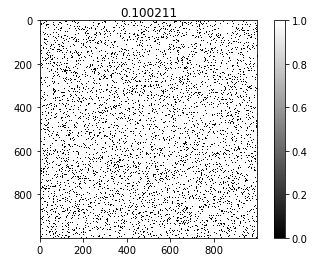

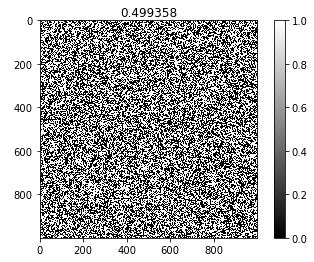

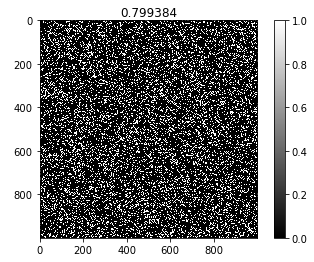

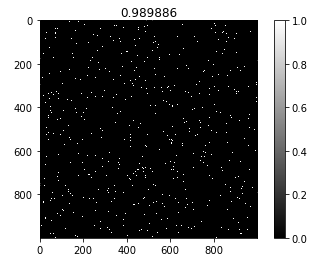

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 1000

for P in (0.1, 0.5, 0.8, 0.99):    
    fig = plt.figure()
    J_bernoulli = (np.random.random((N, N)) < P).astype(int)
    plt.title(J_bernoulli.sum()/N**2)
    plt.imshow(1-J_bernoulli, cmap='gray', interpolation='nearest')
    plt.colorbar()

### Wplyw rozrzedzania 1-C na pojemnosc

Spada liniowo od 0.138 blisko zera, maleje pionowa asymptota do 0 w 1 (C=0)

Pojemnosc definiowana przez $P_+ / N$, $P_+$ to liczba wzorcow ktore jestesmy w stanie rozpoznac

$m_c$ - sredni overlap wszystkich wzorcow dla max zapelnienia sieci. 
Maleje od 1 (powoli blisko 0), przejscie fazowe blisko 1, spada super szybko do 0

Zdolnosc pamieciowa $\bar{\alpha} = \frac{\alpha_c}{N}$ - zaczyna w 0.138 dla 0, wzrasta do nieskonczonosci asymptotycznie dla rozrzedzenia 1

## Synapsy nieliniowe o ograniczonej intensywnosci

Pytanie: przy uczeniu regula Hebba z p wzorcow mozemy miec maksymalnie 2p+1 wartosci synapsy (rzedu N, tyle co neuronow, wiec $10^10$ dla czlowieka). (Pytałem RK dlaczego $2p+1$, nie wiedział). Nie ma takiej granicy w mozgu ludzkim (jest dużo więcej możliwych konfiguracji) wiec to nie o to chodzi (nie stąd wynika granica $p$ wzorców przy tylu konfiguracjach w sieci Hebbowskiej).

### Jak to obejść?
Pomysl nr 1: synapsy o dwoch wartosciach (znormalizowane)

$$T_{ij} = \sqrt{P} \text{ sign}(J_{ij}) / N $$

Pomysl nr 2: obciac wartosci polaczen synaptycznych od rzeczywistego kontinuum do dyskretnego zbioru $\{-1, 0, 1\}$

Przepuszczamy stare Hebbowskie polaczenia $x_{ij}$ przez 
$$F(x) = 0 \text{ for } |x| < x_0\text{ , } sign(x) \text{ for } |x| > x_0$$

(Wykres tej funkcji wyglada jak egipcjanin). Następnie żeby dostać konkretnie wartości połączeń znormalizowane, oczywiście normalizujemy:

$$T_{ij} = \sqrt{P} F(x_{ij}) / N $$

Dla synaps dwuwartosciowych wyniki sa rownowazne sieci zwyklej z odchyleniem $\eta^2 = 0.7$, dostajemy $\alpha_c = 0.1$ a nie musimy trzymac floatow w pamieci i to jest spora zaleta i jest git

Dla synaps 3-wartosciowych max pojemnosc dla cutoffu $x_0 = 0.62$ ($C_0 = 1 - \text{erf}(x_0/\sqrt{2}) = 0.63$), wtedy $\alpha_c = 0.12$. Sredni overlap $0.96$ co nie rozni sie bardzo od $0.97$, wiec jest git.

Wiec to jest git pomysl generalnie.

### szesnastego czerwca zajecia w 309


### Synapsy zapobiegajace blackout catastrophe (spadek sredniego overlapu do 0 przy przeladowaniu sieci)

Pomysl: zmodyfikowac macierz polaczen synaptycznych

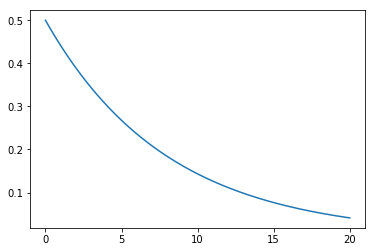

In [3]:
epsilon = 0.5
def Lambda(x):
    return epsilon*np.exp(-x*epsilon**2/2)

x = np.linspace(0, 20, 10000)
y = Lambda(x)
plt.plot(x,y)

$$T_{ij} = 1/N \sum_{\mu = 1}^P \Lambda(\mu / N) \chi_i^\mu \chi_j^\mu)$$

* Pierwszy nauczony wzorzec z $\mu = 1$ - pamietany najlepiej
* Najpozniej nauczony wzorzec $\mu = P$ - pamietany najslabiej

Mozna wtedy dobrac stałą $\epsilon$ w funkcji $\Lambda$ zeby zoptymalizowac dzialanie sieci

### Pojemnosc pamieciowa sieci neuronowych
Mozliwe kryteria:
1. N bitow na neuron
2. zmagazynowanych bitow (ile bitow na wzorzec?) na synapse
3. zmagazynowanych wzorcow na neuron ($\alpha_c$)
4. zmagazynowanych wzorcow na synapse

Problem: basen atrakcji: im wiecej wzorcow tym mniejszy basen atrakcji

**problem biezacy i nierozwiazany**

>John von Neumann: Fermi-szacowanie liczby bitow ktore docieraja do czlowieka w ciagu zycia. $10^{20}$


> Amit (NIE AMRIT) - monografia na temat SSN, napisana jak dla fizykow: liczba zmagazynowanych nieskorelowanych wzorcow ~ liczba synaps na neuron, mniej wiecej dwakrotnie proporcjonalna

$10^4$ sasiadow na neuron, wiec $2 * 10^4$. Troche machania raczkami, wychodzi $2*10^{15}$ bitow w ciagu zycia.

### Rzeczy pod kolokwium
* $\alpha = P/N$ - liczba efektywnie rozpoznanych wzorcow przez liczbe neuronow
* $\alpha_c$ - pojemnosc krytyczna, 0.138 dla Hopfielda
* Sieci z szumem, $\alpha = f(T)$, wykres od temperatury (spada troche jak $cos^2$ ale wyplaszcza sie w T=1)

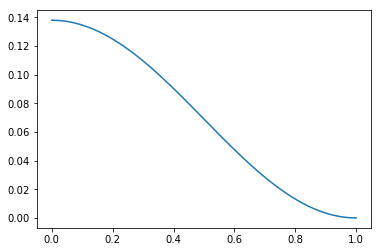

In [8]:
f = lambda x: 0.138*np.cos(np.pi*x/2)**2
x = np.linspace(0,1,100)
plt.plot(x, f(x))

* *blackout catastrophe*: błąd przy rozpoznawaniu wzorca rośnie powoli od 0 i leci do 50% z przejściem fazowym w $\alpha_c$

(wszystkie neurony zamienione -> negatyw, polowa neuronow zamieniona -> "kasza")